In [29]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import matplotlib.pyplot as pl
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact,fixed
import utils

# Gaussian process regression 

## Lecture 2: Covariance functions and model selection

### Suzanne Aigrain, University of Oxford

#### Saas Fee School 2020: Astronomy in the Era of Big Data

## Covariance functions

The only requirement for the covariance function is that it should return a ***positive semi-definite*** covariance matrix.

The simplest covariance functions have two parameters: one input and one output variance (or scale). The form of the covariance function controls the degree of smoothness.

### The squared exponential

The simplest, most widely used kernel is the Squared Exponential (SE):
$$
k_{\rm SE}(x,x') = A \exp \left[ - \Gamma (x-x')^2 \right].
$$
This gives rise to *smooth* functions with output variance $A$ and input variance $\Gamma$. The SE kernel is also sometimes defined as:
$$
k_{\rm SE}(x,x') = A \exp \left[ - \frac{(x-x')^2}{2l^2} \right].
$$
where $l = (2 \Gamma)^{-1/2}$ is the characteristic input scale (or length scale).

In [41]:
interact(utils.pltsamples, kernel=fixed('SE'),
         par1 = widgets.FloatSlider(min=-1,max=1,step=0.5,description=r'$\log_{10} A$',value=0),
         par2 = widgets.FloatSlider(min=-1,max=1,step=0.5,description=r'$\log_{10} \Gamma$',value=0),
         wn = widgets.FloatSlider(min=-2,max=0,step=1,description=r'$\log_{10} \sigma$',value=-2),
         par3 = fixed(0.0), 
         par4 = fixed(0.0)
        );

interactive(children=(FloatSlider(value=0.0, description='$\\log_{10} A$', max=1.0, min=-1.0, step=0.5), Float…

### The Matern family

The Matern 3/2 kernel
$$
k_{3/2}(x,x')= A \left( 1 + \frac{\sqrt{3}r}{l} \right) \exp \left( - \frac{\sqrt{3}r}{l} \right),
$$
where $r =|x-x'|$.

It produces somewhat rougher behaviour, because it is only differentiable once w.r.t. $r$ (whereas the SE kernel is infinitely differentiable). 

There is a whole family of Matern kernels, with varying degrees of roughness. 

In [42]:
interact(utils.pltsamples, 
         kernel = widgets.RadioButtons(options=['SE','M32'], value='SE',description='kernel'),
         par1 = fixed(0.0),
         par2 = fixed(0.0),
         wn = fixed(-2.0),
         par3 = fixed(0.0), 
         par4 = fixed(0.0)
        );

interactive(children=(RadioButtons(description='kernel', options=('SE', 'M32'), value='SE'), Output()), _dom_c…

## The rational quadratic kernel 

is equivalent to a squared exponential with a powerlaw distribution of input scales
$$
k_{\rm RQ}(x,x') = A^2 \left(1 + \frac{r^2}{2 \alpha l} \right)^{-\alpha},
$$
where $\alpha$ is the index of the power law. 

This is useful to model data containing variations on a range of timescales with just one extra parameter.

In [43]:
interact(utils.pltsamples, 
         kernel = fixed('RQ'),
         par1 = fixed(0.0), 
         par2 = fixed(0.0),
         wn = fixed(-2.0),
         par3 = widgets.FloatSlider(min=-1,max=1,step=0.5,description=r'$\ln\alpha$',value=1), 
         par4 = fixed(0.0)
        );

interactive(children=(FloatSlider(value=1.0, description='$\\ln\\alpha$', max=1.0, min=-1.0, step=0.5), Output…

## Periodic kernels...

...can be constructed by replacing $r$ in any of the above by a periodic function of $r$. For example, the cosine kernel:
$$
k_{\cos}(x,x') = A \cos\left(\frac{2\pi r}{P}\right),
$$
[which follows the dynamics of a simple harmonic oscillator], or...

...the "exponential sine squared" kernel:
$$
k_{\sin^2 {\rm SE}}(x,x') = A \exp \left[ -\Gamma \sin^2\left(\frac{\pi r}{P}\right) \right],
$$
which allows for non-harmonic functions. The parameter $\Gamma$ controls the complexity of the periodic signal.  

In [45]:
interact(utils.pltsamples, 
         kernel = fixed('Per'),
         par1 = fixed(0.0), 
         par2 = widgets.FloatSlider(min=-1,max=1,step=0.5,description=r'$\log_{10} \Gamma$',value=0),
         wn = fixed(-2.0),
         par3 = widgets.FloatSlider(min=1,max=5,step=1,description=r'$P$',value=3), 
         par4 = fixed(0.0)
        );

interactive(children=(FloatSlider(value=0.0, description='$\\log_{10} \\Gamma$', max=1.0, min=-1.0, step=0.5),…

Note the strong correlation between $\Gamma$ and the amplitude of the variations, even though $A$ is fixed here. 

This kernel is obtained by mapping the 1-D variable $x$ to the 2-D variable $\mathbf{u}(x)=(\cos(x),\sin(x))$, and then applying a squared exponential in $\mathbf{u}$-space.

## Combining kernels

Any ***affine tranformation***, sum or product of valid kernels is a valid kernel.

Affine transformations include translation, scaling, shear mapping, rotation, reflection, and any combination thereof. Any affine transformation can be written as the composition of a linear transformation and a translation.

For example, a quasi-periodic kernel can be constructed by multiplying a periodic kernel with a non-periodic one. The following is frequently used to model stellar light curves:
$$
k_{\mathrm{QP}}(x,x') = A \exp \left[  -\Gamma_1 \sin^2\left(\frac{\pi r}{P}\right)   -\Gamma_2 r^2 \right].
$$

In [46]:
interact(utils.pltsamples, 
         kernel = fixed('QP'),
         par1 = fixed(0.0), 
         par2 = fixed(0.0),
         wn = fixed(-2.0),
         par3 = widgets.FloatSlider(min=1,max=5,step=1,description=r'$P$',value=3), 
         par4 = widgets.FloatSlider(min=-3,max=0,step=1,description=r'$\log_{10} \Gamma_2$',value=-3)
        );

interactive(children=(FloatSlider(value=3.0, description='$P$', max=5.0, min=1.0, step=1.0), FloatSlider(value…

## Additive GPs

Recall from the previous lecture the mean and variance of the predictive distribution for a GP trained on noisy data:

$$
\begin{array}{lll}
\overline{y_*} & = &  \mathbf{k}_*^{\rm T} \, (\mathbf{K} + \sigma^2 \mathbb{I})^{-1} \, \mathbf{y}, \\
\mathbb{V}[y_*] & = & k(x_*,x_*) - \mathbf{k}_*^{\rm T} \, (\mathbf{K} + \sigma^2 \mathbb{I})^{-1} \, \mathbf{k}_*,
\end{array}
$$

This enables us to make "noise free" predictions from noisy observations. 

Here our model for the training set was the sum of two GPs: one with covariance function $k$, and one with a purely diagonal covariance function representing white noise.

More generally, if $y^{(n)} \sim \mathcal{GP}(m^{(n)},k^{(n)})$ and $y=\sum_n y^{(n)}$, then 
$y \sim \mathcal{GP}\left(\sum_n m^{(n)}, \sum_n k^{(n)}\right)$. 

Given a set of observed $\mathbf{y}$, the predictive distribution for a given compnent $y_n$ at some test input $x_*$ is a Gaussian with mean and variance:

$$
\begin{array}{lll}
\overline{y_*^{(n)}} & = & \left(\mathbf{k}_*^{(n)}\right)^{\rm T} \, \mathbf{K}^{-1} \, \mathbf{y}, \\
\mathbb{V}[y_*^{(n)}] & = & k^{(n)}(x_*,x_*) - \left(\mathbf{k}^{(n)}_*\right)^{\rm T} \, \mathbf{K}^{-1} \, \mathbf{k}^{(n)}_*,
\end{array}
$$
where 
- $\mathbf{K}$ is the covariance matrix for the full model evaluated at the training points: $K_{ij} = \sum_n k^{(n)}(x_i,x_j)$;
- $\mathbf{k}^{(n)}_*$ is the vector of covariances between the test point and the training points, including only the $n^{\rm th}$ term: $k^{(n)}_{*,i}=k^{(n)}(x_*,x_i)$. 

## Example: Mauna Kea CO$_2$ dataset

(From Rasmussen & Williams textbook)

<img width="60%" src="images/RW_mauna_kea.png">

## Example: Mauna Kea CO$_2$ dataset

(From Rasmussen & Williams textbook)

<img width="80%" src="images/RW_mauna_kea_2.png">

## Changepoints

(From Roberts et al. 2013, Proceedings of the Royal Society A)

<img width="1200" src="images/changepoints.jpg">

# <font color=red>DONE TILL HERE</font>

Need to insert K2SC example to illustrate change points

## What if it's not Gaussian?

Thanks to the central limit theorem, the assumption of Gaussianity is often approximately correct. But by no means always.

Empirically, GPs often do an amazing job of explaning the data, even when they are not an appropriate model. This is a blessing and a curse.

## What if it's not Gaussian?

Student's t distributions have longer tails than Gaussians, and also have nice analytic conditioning and marginalisation identities, though mathematically more complicated.

<img src = "images/students-t.png">

### 2 or more dimensions

So far we assumed the inputs were 1-D but that doesn't have to be the case. For example, the SE kernel can be extended to D dimensions...

using a single length scale, giving the *Radial Basis Function* (RBF) kernel:
$$
k_{\rm RBF}(\mathbf{x},\mathbf{x'}) = A \exp \left[ - \Gamma \sum_{j=1}^{D}(x_j-x'_j)^2 \right],
$$
where $\mathbf{x}=(x_1,x_2,\ldots, x_j,\ldots,x_D)^{\mathrm{T}}$ represents a single, multi-dimensional input.

or using separate length scales for each dimension, giving the *Automatic Relevance Determination* (ARD) kernel:
$$
k_{\rm ARD}(\mathbf{x},\mathbf{x'}) = A \exp \left[ - \sum_{j=1}^{D} \Gamma_j (x_j-x'_j)^2 \right].
$$

In [15]:
import george
x2d, y2d = np.mgrid[-3:3:0.1,-3:3:0.1]
x = x2d.ravel()
y = y2d.ravel()
N = len(x)
X = np.zeros((N,2))
X[:,0] = x
X[:,1] = y

In [16]:
k1 = george.kernels.ExpSquaredKernel(1.0,ndim=2)
s1 = george.GP(k1).sample(X).reshape(x2d.shape)

In [17]:
k2 = george.kernels.ExpSquaredKernel(1.0,ndim=2,axes=1) + george.kernels.ExpSquaredKernel(0.2,ndim=2,axes=0)
s2 = george.GP(k2).sample(X).reshape(x2d.shape)

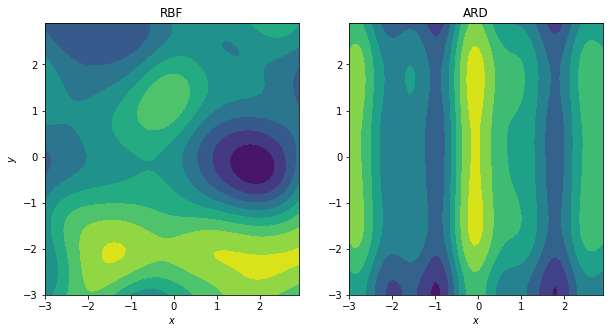

In [18]:
pl.figure(figsize=(10,5))
pl.subplot(121)
pl.contourf(x2d,y2d,s1)
pl.xlim(x.min(),x.max())
pl.ylim(y.min(),y.max())
pl.xlabel(r'$x$')
pl.ylabel(r'$y$')
pl.title('RBF')
pl.subplot(122)
pl.contourf(x2d,y2d,s2)
pl.xlim(x.min(),x.max())
pl.ylim(y.min(),y.max())
pl.xlabel(r'$x$')
pl.title('ARD');